In [1]:

import os
import gym
import numpy as np
import matplotlib.pyplot as plt
import cv2

import torch
import torch.nn as nn
import torch.nn.functional as F

from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize

In [2]:
%matplotlib inline

In [3]:
# get birds-eye from env
def render_birds_eye(my_env):
    viewer = my_env.unwrapped.viewer
    camera_id = 0
    camera_distance = 0.8
    camera_azimuth = 0
    camera_elevation = -90
    
    if viewer is not None:
        viewer.cam.lookat[0] = 0
        viewer.cam.lookat[1] = 0
        viewer.cam.lookat[2] = 0
        viewer.cam.distance = camera_distance
        viewer.cam.azimuth = camera_azimuth
        viewer.cam.elevation = camera_elevation

    return my_env.render()

# get birds-eye from vec_env
def new_render(my_vec_env, my_env):
    # Retrieve qpos and qvel from the simulation
    qpos = my_vec_env.envs[0].env.unwrapped.data.qpos.flat.copy()
    qvel = my_vec_env.envs[0].env.unwrapped.data.qvel.flat.copy()
    my_env.unwrapped.set_state(qpos, qvel)
    return render_birds_eye(my_env)
    


In [7]:
# just for notebook format
os.environ['LD_LIBRARY_PATH'] = "/data/pulkitag/misc/spiridea/.mujoco/mujoco210/bin:/usr/lib/nvidia"
os.environ['MUJOCO_PY_MUJOCO_PATH'] = "/data/pulkitag/misc/spiridea/.mujoco/mujoco210"
os.environ['MUJOCO_GL'] = 'egl'
os.environ['PYOPENGL_PLATFORM'] = 'egl'

In [5]:

# load expert model for reacher
model = PPO.load("ppo_reacher_expert")


In [8]:
env = gym.make("Reacher-v4", render_mode = 'rgb_array')
vec_env = make_vec_env("Reacher-v4", n_envs=4)
env.reset()
env.render()

Import error. Trying to rebuild mujoco_py.


/data/pulkitag/misc/spiridea/miniconda3/envs/reacher_env/compiler_compat/ld: warning: /data/pulkitag/misc/spiridea/miniconda3/envs/reacher_env/lib/libgomp.so: unsupported GNU_PROPERTY_TYPE (5) type: 0xc0010001
/data/pulkitag/misc/spiridea/miniconda3/envs/reacher_env/compiler_compat/ld: warning: /data/pulkitag/misc/spiridea/miniconda3/envs/reacher_env/lib/libgomp.so: unsupported GNU_PROPERTY_TYPE (5) type: 0xc0010002
/data/pulkitag/misc/spiridea/miniconda3/envs/reacher_env/compiler_compat/ld: warning: /data/pulkitag/misc/spiridea/miniconda3/envs/reacher_env/lib/libgcc_s.so.1: unsupported GNU_PROPERTY_TYPE (5) type: 0xc0010001
/data/pulkitag/misc/spiridea/miniconda3/envs/reacher_env/compiler_compat/ld: warning: /data/pulkitag/misc/spiridea/miniconda3/envs/reacher_env/lib/libgcc_s.so.1: unsupported GNU_PROPERTY_TYPE (5) type: 0xc0010002
/data/pulkitag/misc/spiridea/miniconda3/envs/reacher_env/compiler_compat/ld: warning: /lib/x86_64-linux-gnu/libc.so.6: unsupported GNU_PROPERTY_TYPE (5) t

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[88, 88, 88],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [89, 89, 89]],

       [[88, 88, 88],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [89, 89, 89]],

       [[88, 88, 88],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [89, 89, 89]]], dtype=uint8)

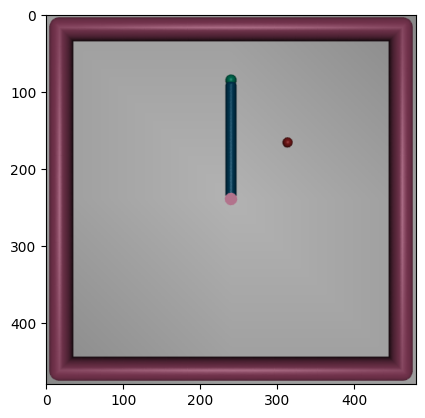

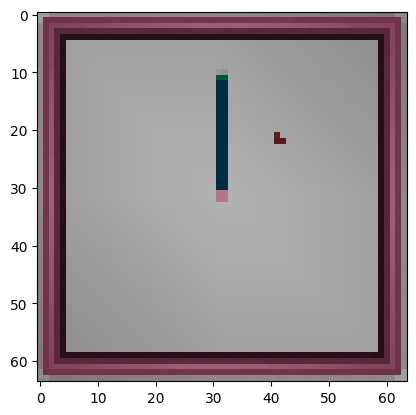

In [29]:
# Retrieve qpos and qvel from the simulation
image = new_render(vec_env, env)
plt.imshow(image)
plt.show()
plt.imshow(cv2.resize(image, (64, 64)))

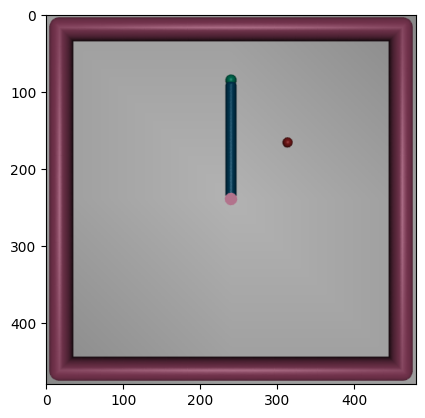

In [31]:
plt.imshow(render_birds_eye(env))

<TimeLimit<OrderEnforcing<PassiveEnvChecker<ReacherEnv<Reacher-v4>>>>>
0
hello
[ 9.99831766e-01  9.99143576e-01  1.83422686e-02  4.13777111e-02
 -2.01565686e-02 -7.94627912e-02  1.99731779e-04 -1.83078917e-03
  2.29943563e-01  8.78637222e-02  0.00000000e+00]


/data/pulkitag/misc/spiridea/miniconda3/envs/reacher_env/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


False False


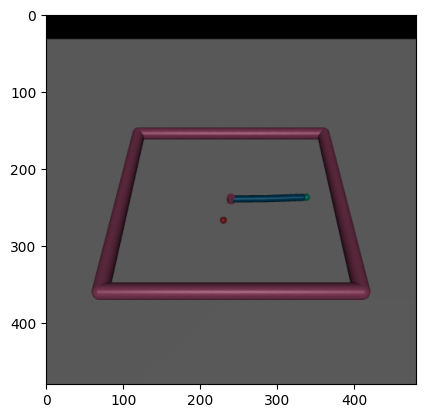

1
hello
[ 0.99990835  0.99934434  0.01353831  0.03620627 -0.02015657 -0.07946279
 -0.47906205 -0.51399669  0.23001126  0.08628784  0.        ]
False False


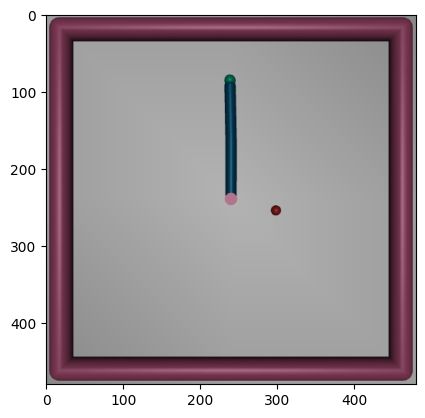

2
hello
[ 0.99999833  0.99980456 -0.00182511  0.01976966 -0.02015657 -0.07946279
 -1.0554031  -1.12828079  0.23013868  0.08125501  0.        ]
False False


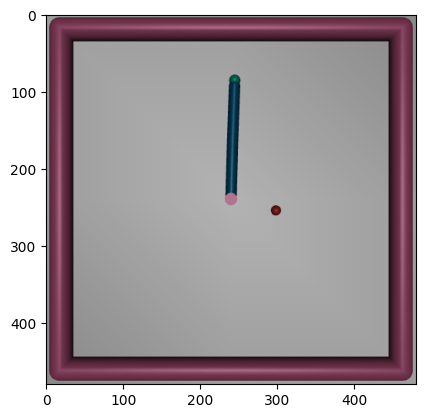

3
hello
[ 0.99962431  0.99996687 -0.02740891 -0.00813992 -0.02015657 -0.07946279
 -1.50183475 -1.66104009  0.23004951  0.0728126   0.        ]
False False


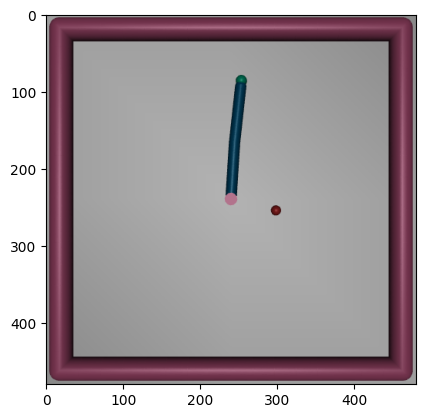

4
hello
[ 0.99802048  0.99891763 -0.06288978 -0.0465141  -0.02015657 -0.07946279
 -2.04824372 -2.17633121  0.22930033  0.06115772  0.        ]
False False


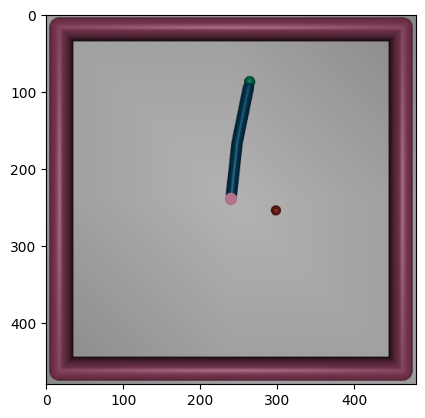

5
hello
[ 0.99414957  0.99552841 -0.10801222 -0.09446258 -0.02015657 -0.07946279
 -2.47952649 -2.62943337  0.22731674  0.04650384  0.        ]
False False


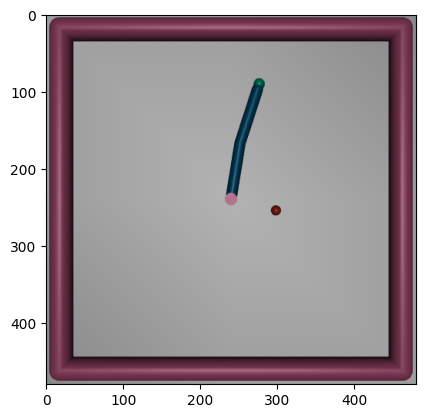

6
hello
[ 0.98716614  0.98832673 -0.15969664 -0.15234919 -0.02015657 -0.07946279
 -2.73562219 -3.2027705   0.22351775  0.02958869  0.        ]
False False


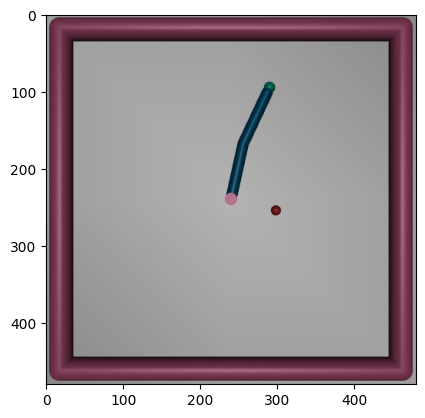

7
hello
[ 0.97653448  0.97568603 -0.21536113 -0.21917293 -0.02015657 -0.07946279
 -2.93155759 -3.59810493  0.21742502  0.01126998  0.        ]
False False


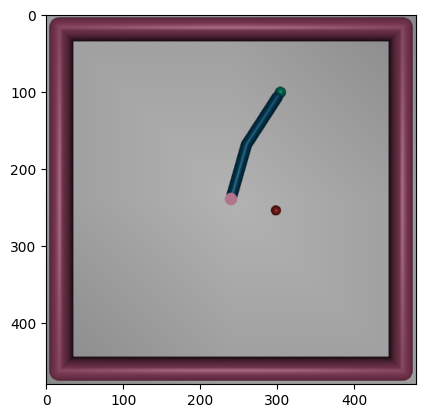

8
hello
[ 0.96169477  0.956004   -0.27412253 -0.29335362 -0.02015657 -0.07946279
 -3.12934262 -4.07691909  0.20861285 -0.0078088   0.        ]
False False


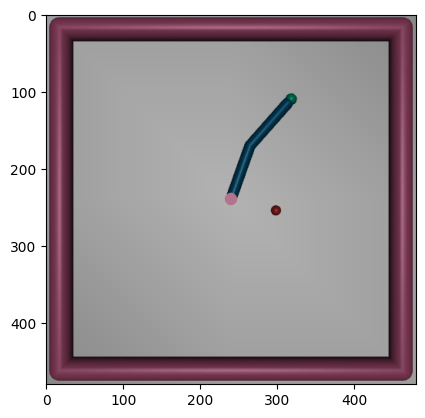

9
hello
[ 0.94210332  0.92785605 -0.33532273 -0.37293854 -0.02015657 -0.07946279
 -3.29716492 -4.36622865  0.19676603 -0.02694182  0.        ]
False False


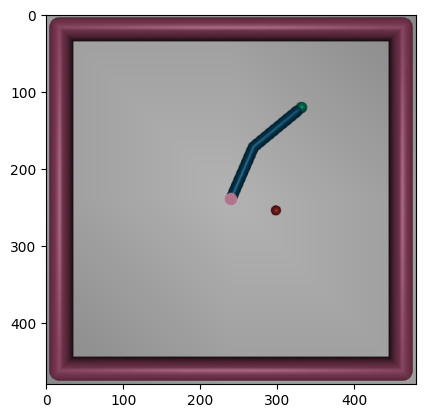

10
hello
[ 0.91774358  0.89024147 -0.39717342 -0.45548888 -0.02015657 -0.07946279
 -3.35136882 -4.70735927  0.18190266 -0.04513066  0.        ]
False False


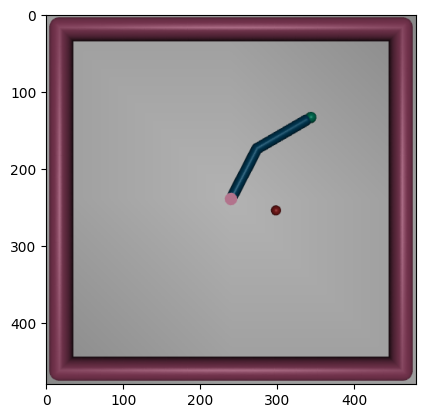

11
hello
[ 0.88879844  0.84228111 -0.45829831 -0.53903853 -0.02015657 -0.07946279
 -3.41291168 -4.92928958  0.16421008 -0.06152934  0.        ]
False False


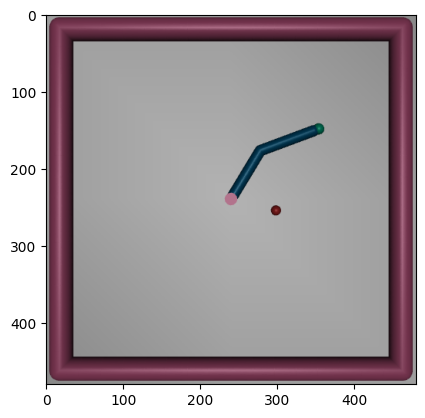

12
hello
[ 0.85552057  0.78367257 -0.51776883 -0.62117413 -0.02015657 -0.07946279
 -3.40325303 -5.16441416  0.14407929 -0.07540479  0.        ]
False False


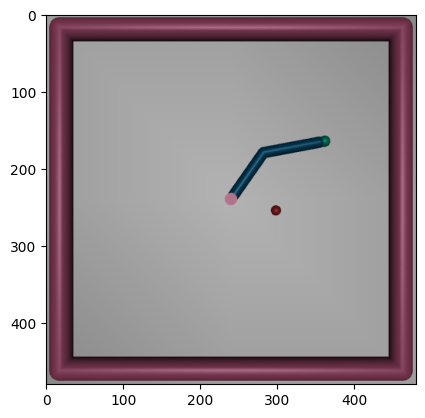

13
hello
[ 0.81914508  0.71464318 -0.57358638 -0.69948919 -0.02015657 -0.07946279
 -3.26086998 -5.27944224  0.12233072 -0.0860141   0.        ]
False False


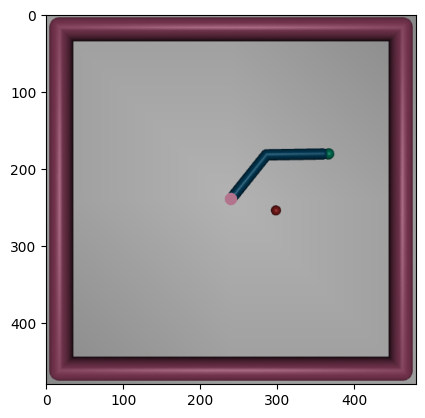

14
hello
[ 0.78065829  0.63650261 -0.62495811 -0.77127454 -0.02015657 -0.07946279
 -3.15952011 -5.33623599  0.09985879 -0.09302088  0.        ]
False False


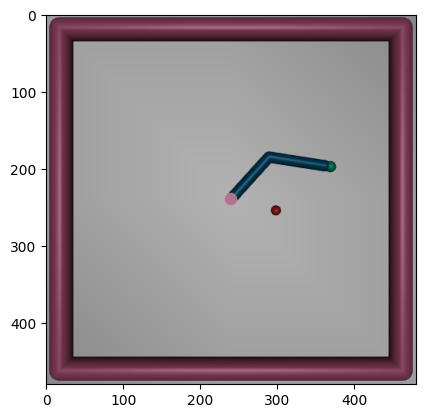

15
hello
[ 0.74143185  0.54947877 -0.67102817 -0.83550768 -0.02015657 -0.07946279
 -2.89304765 -5.48476004  0.07744233 -0.09634075  0.        ]
False False


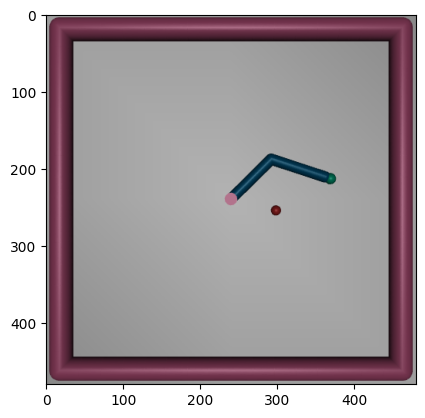

16
hello
[ 0.70373287  0.45502383 -0.71046467 -0.89047926 -0.02015657 -0.07946279
 -2.56440696 -5.44948596  0.05616133 -0.09607689  0.        ]
False False


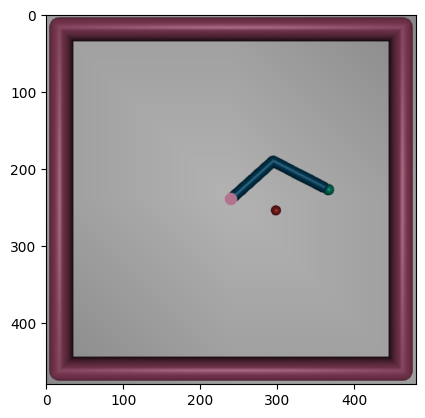

17
hello
[ 0.66821941  0.35604007 -0.74396426 -0.93447069 -0.02015657 -0.07946279
 -2.31892939 -5.3879325   0.03667532 -0.09275802  0.        ]
False False


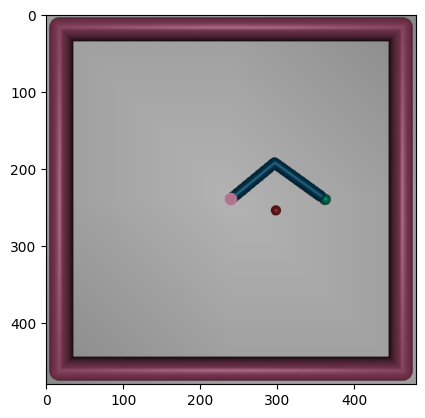

18
hello
[ 0.63618708  0.25426585 -0.77153483 -0.96713436 -0.02015657 -0.07946279
 -1.90909719 -5.30617008  0.01948907 -0.08695054  0.        ]
False False


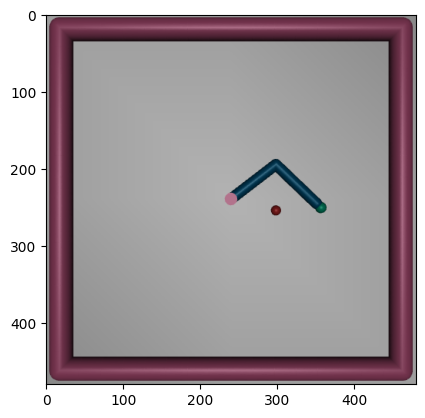

19
hello
[ 6.09066119e-01  1.52279469e-01 -7.93119450e-01 -9.88337474e-01
 -2.01565686e-02 -7.94627912e-02 -1.55842016e+00 -5.11589262e+00
  5.03953071e-03 -7.93503259e-02  0.00000000e+00]
False False


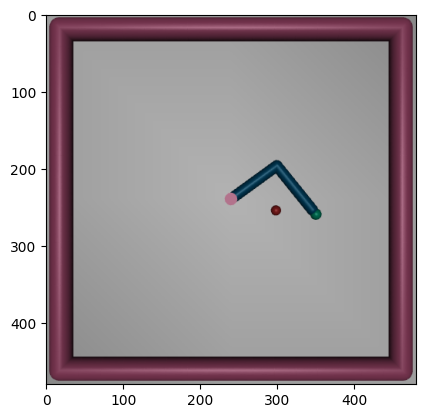

20
hello
[ 0.58721946  0.05206807 -0.80942776 -0.99864354 -0.02015657 -0.07946279
 -1.16919108 -4.96287686 -0.00667476 -0.0706224   0.        ]
False False


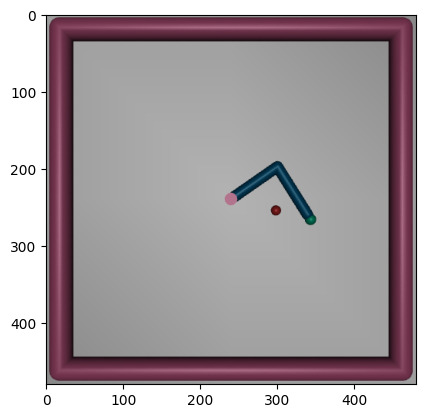

21
hello
[ 0.57084918 -0.04594879 -0.82105494 -0.9989438  -0.02015657 -0.07946279
 -0.83986173 -4.84318124 -0.01586467 -0.06121978  0.        ]
False False


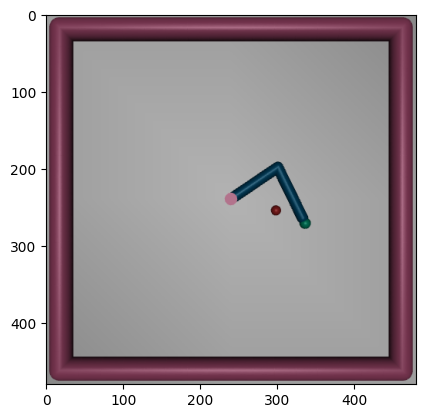

22
hello
[ 0.56076623 -0.14075485 -0.82797418 -0.99004448 -0.02015657 -0.07946279
 -0.38452615 -4.68323487 -0.02261989 -0.05158511  0.        ]
False False


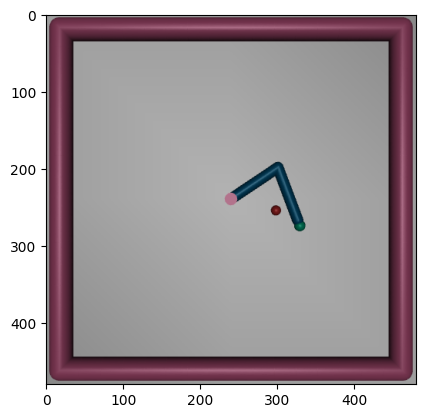

23
hello
[ 0.55799097 -0.23063687 -0.82984702 -0.97303989 -0.02015657 -0.07946279
  0.04828563 -4.46831307 -0.02702302 -0.04219269  0.        ]
False False


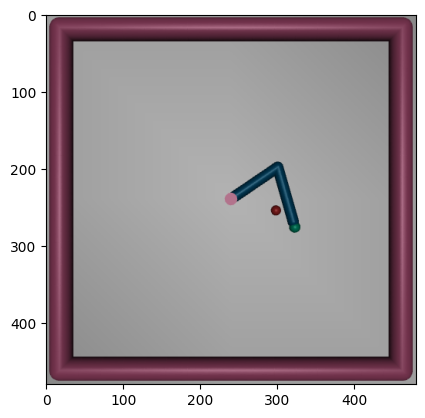

24
hello
[ 0.56198787 -0.31428477 -0.82714547 -0.94932876 -0.02015657 -0.07946279
  0.43286713 -4.22958095 -0.02944915 -0.03334229  0.        ]
False False


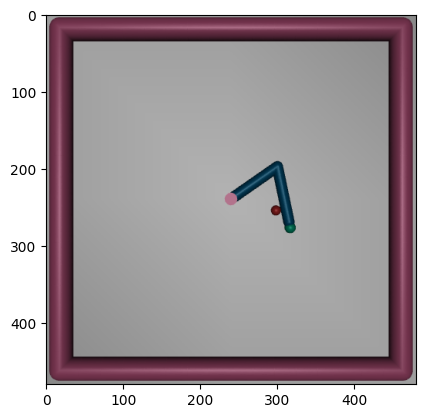

25
hello
[ 0.5710376  -0.39109328 -0.8209239  -0.92035105 -0.02015657 -0.07946279
  0.66457759 -3.98284434 -0.03041518 -0.02512414  0.        ]
False False


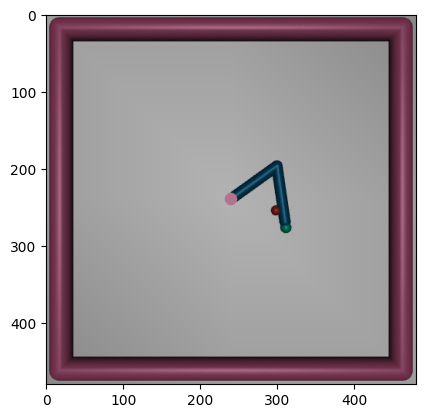

26
hello
[ 0.58368411 -0.46056589 -0.81198083 -0.88762552 -0.02015657 -0.07946279
  0.88362393 -3.69944341 -0.03032672 -0.01758856  0.        ]
False False


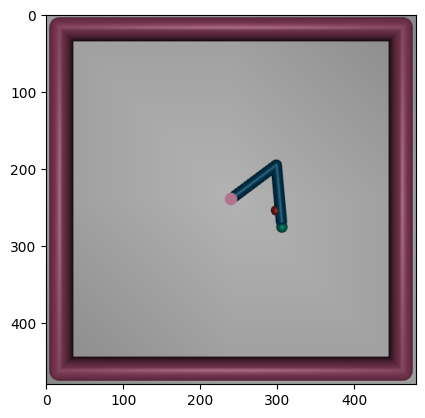

27
hello
[ 0.59860517 -0.52280942 -0.80104423 -0.8524496  -0.02015657 -0.07946279
  0.96612251 -3.45244977 -0.02952164 -0.0107051   0.        ]
False False


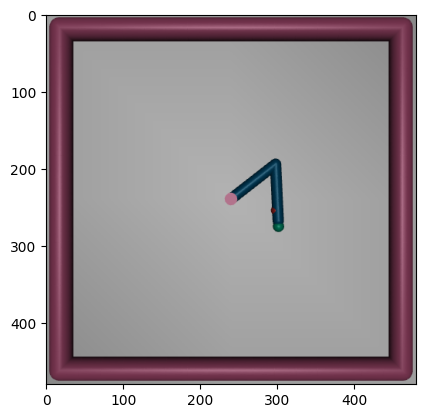

28
hello
[ 0.61514476 -0.57761996 -0.78841418 -0.81630581 -0.02015657 -0.07946279
  1.11447234 -3.11534511 -0.02820878 -0.00452011  0.        ]
False False


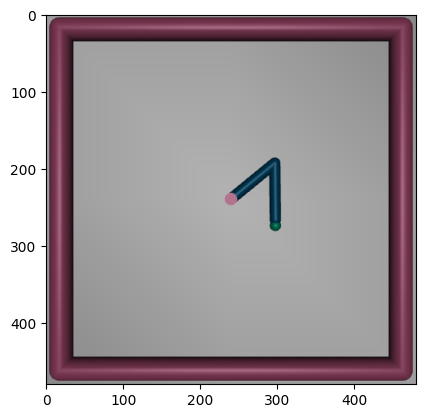

29
hello
[ 6.33410181e-01 -6.25055212e-01 -7.73816220e-01 -7.80580542e-01
 -2.01565686e-02 -7.94627912e-02  1.22343706e+00 -2.82484395e+00
 -2.64960945e-02  8.98846053e-04  0.00000000e+00]
False False


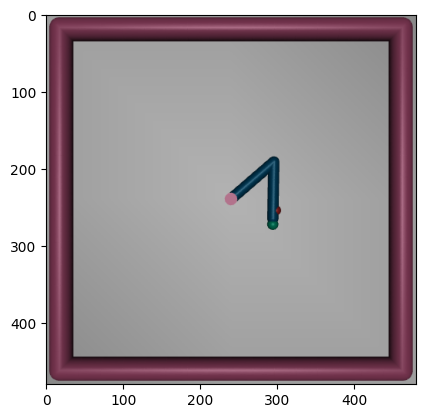

30
hello
[ 0.6536859  -0.66604494 -0.75676598 -0.74591162 -0.02015657 -0.07946279
  1.42515061 -2.54524421 -0.02446002  0.00559567  0.        ]
False False


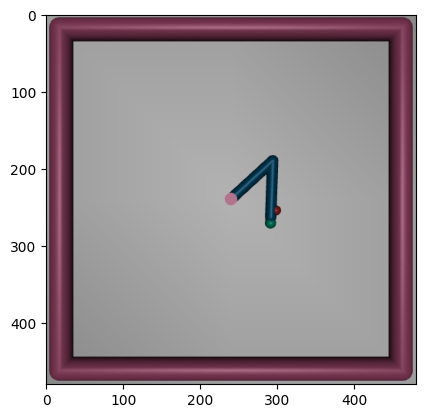

31
hello
[ 0.67546386 -0.70091424 -0.73739309 -0.71324556 -0.02015657 -0.07946279
  1.48950936 -2.23425801 -0.02222936  0.00958219  0.        ]
False False


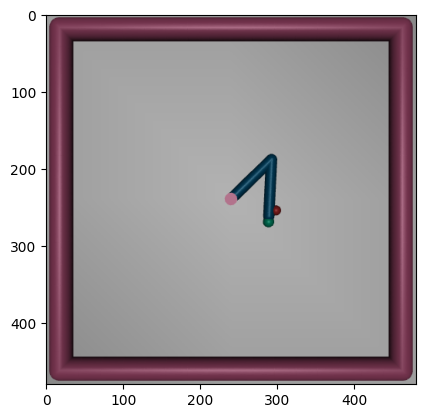

32
hello
[ 0.69718772 -0.73067933 -0.71688861 -0.68272081 -0.02015657 -0.07946279
  1.49781333 -2.03021906 -0.01999876  0.01303545  0.        ]
False False


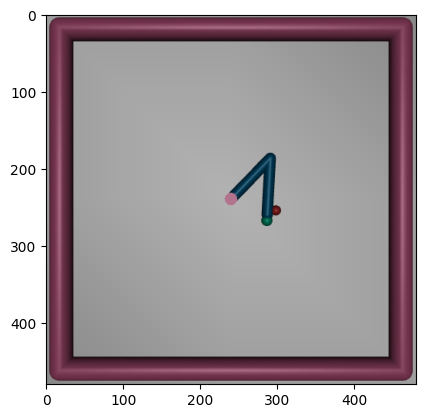

33
hello
[ 0.71909781 -0.75623317 -0.69490887 -0.65430222 -0.02015657 -0.07946279
  1.60543649 -1.79260483 -0.01776714  0.01602267  0.        ]
False False


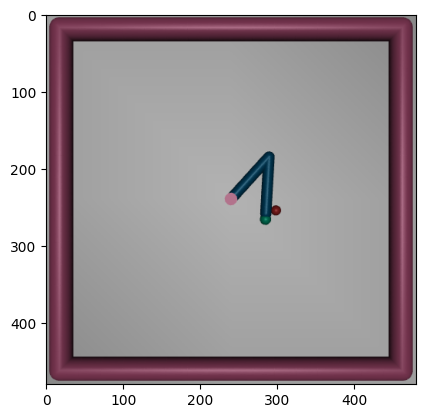

34
hello
[ 0.74103528 -0.77734393 -0.6714661  -0.62907584 -0.02015657 -0.07946279
  1.60533476 -1.4979543  -0.01556856  0.01845351  0.        ]
False False


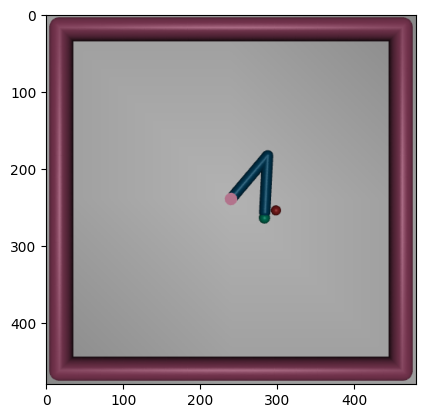

35
hello
[ 0.76277762 -0.79412314 -0.64666089 -0.60775688 -0.02015657 -0.07946279
  1.69304923 -1.21607381 -0.0134284   0.0202908   0.        ]
False False


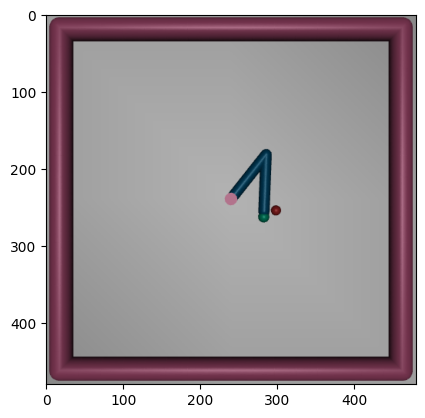

36
hello
[ 0.78379039 -0.80682865 -0.62102546 -0.59078551 -0.02015657 -0.07946279
  1.62202119 -0.90504384 -0.01138488  0.02154138  0.        ]
False False


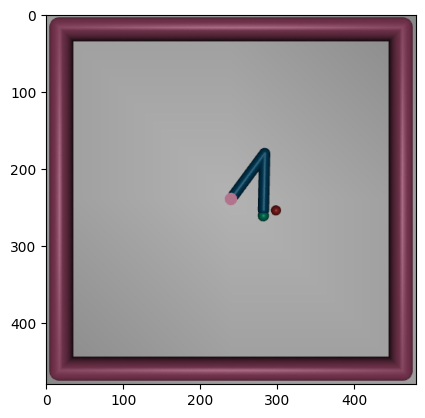

37
hello
[ 0.80373915 -0.81576541 -0.59498183 -0.57838292 -0.02015657 -0.07946279
  1.65858904 -0.62459752 -0.00944641  0.02221937  0.        ]
False False


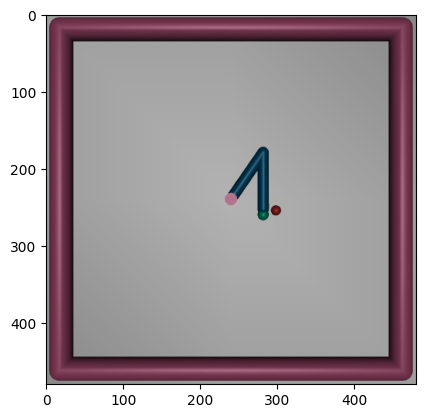

38
hello
[ 0.82295786 -0.82189694 -0.56810243 -0.56963622 -0.02015657 -0.07946279
  1.64593524 -0.4441865  -0.00754745  0.02244748  0.        ]
False False


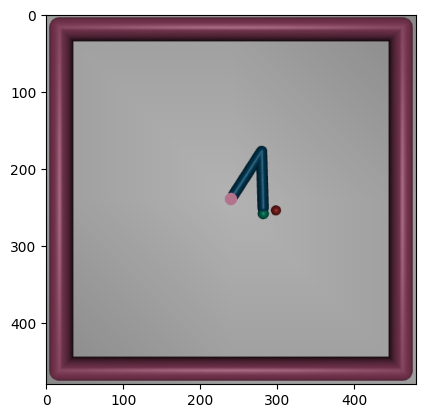

39
hello
[ 0.84110871 -0.82579485 -0.5408661  -0.56397062 -0.02015657 -0.07946279
  1.62730043 -0.24417877 -0.0056903   0.02232749  0.        ]
False False


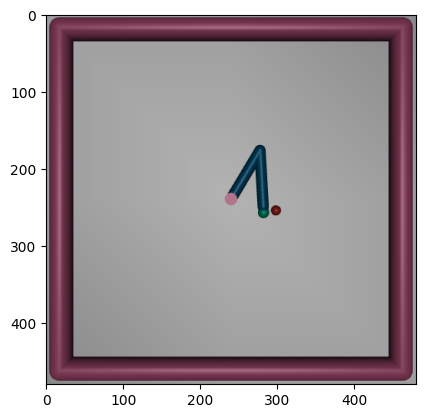

40
hello
[ 0.85835001 -0.82770098 -0.51306458 -0.56116939 -0.02015657 -0.07946279
  1.64415969 -0.09514335 -0.0038295   0.02188468  0.        ]
False False


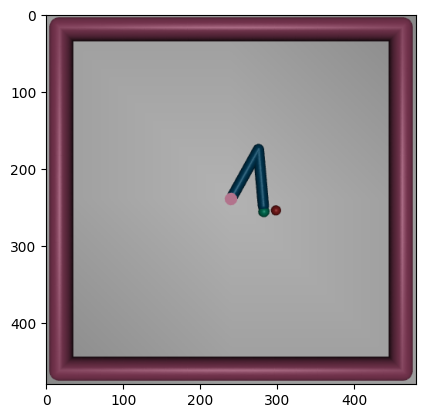

41
hello
[ 0.87408027 -0.82841084 -0.48578152 -0.56012095 -0.02015657 -0.07946279
  1.50572795 -0.03168271 -0.00201671  0.02129662  0.        ]
False False


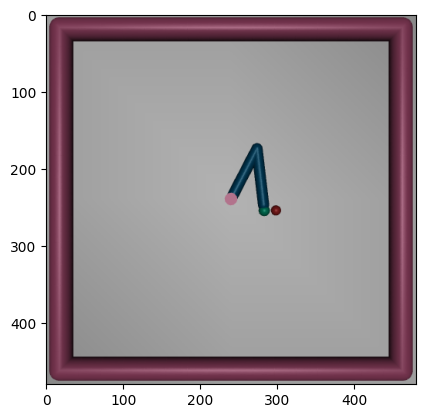

42
hello
[ 8.88192978e-01 -8.28336758e-01 -4.59470601e-01 -5.60230502e-01
 -2.01565686e-02 -7.94627912e-02  1.48015561e+00  4.46532985e-02
 -2.68688558e-04  2.06461587e-02  0.00000000e+00]
False False


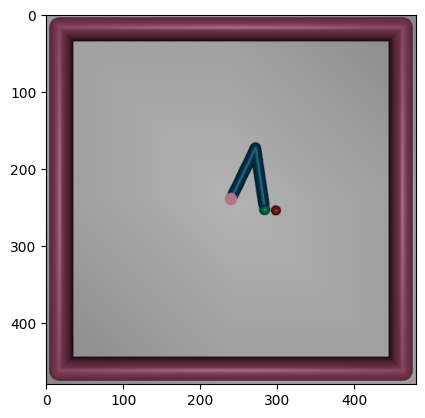

43
hello
[ 0.9011385  -0.82725679 -0.43353131 -0.561824   -0.02015657 -0.07946279
  1.41917201  0.14750288  0.00147589  0.01986935  0.        ]
False False


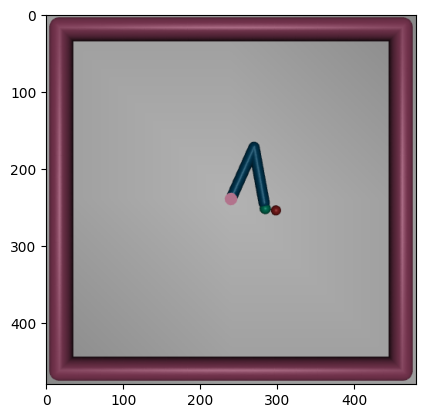

44
hello
[ 0.91324466 -0.82508662 -0.40741157 -0.56500625 -0.02015657 -0.07946279
  1.45968072  0.23737712  0.00327445  0.01893938  0.        ]
False False


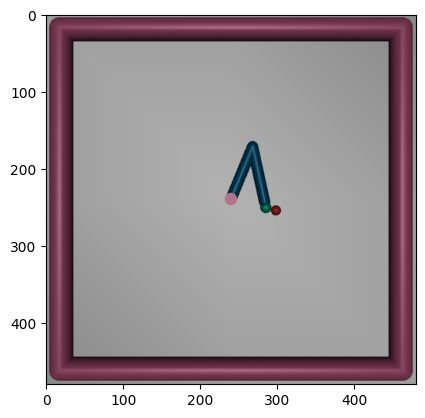

45
hello
[ 0.92427515 -0.82186146 -0.38172694 -0.56968741 -0.02015657 -0.07946279
  1.33612504  0.33077491  0.00510408  0.01787979  0.        ]
False False


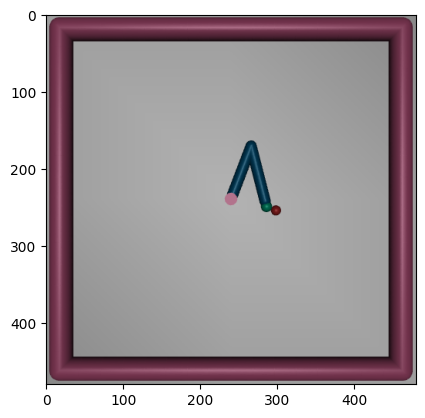

46
hello
[ 0.93444878 -0.81774877 -0.35609758 -0.57557533 -0.02015657 -0.07946279
  1.42115397  0.38724283  0.00699983  0.01672186  0.        ]
False False


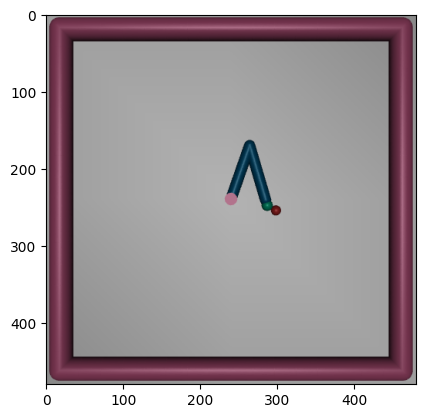

47
hello
[ 0.94411453 -0.81295276 -0.32961758 -0.58232964 -0.02015657 -0.07946279
  1.39791233  0.44096708  0.0090267   0.0155006   0.        ]
False False


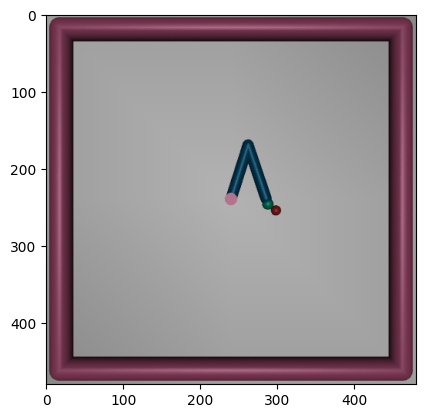

48
hello
[ 0.95312147 -0.80728431 -0.30258795 -0.59016272 -0.02015657 -0.07946279
  1.45108635  0.5256492   0.01118691  0.01419959  0.        ]
False False


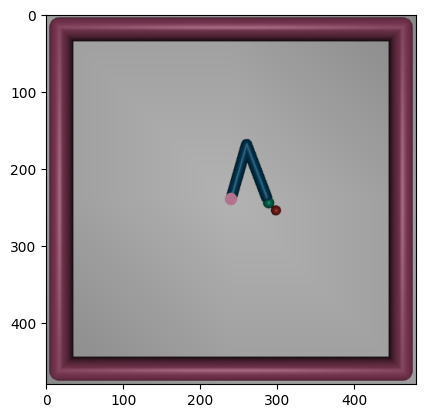

49
hello
[ 0.96121883 -0.80085669 -0.27578682 -0.59885604 -0.02015657 -0.07946279
  1.349109    0.55540461  0.01343341  0.01285986  0.        ]
False True


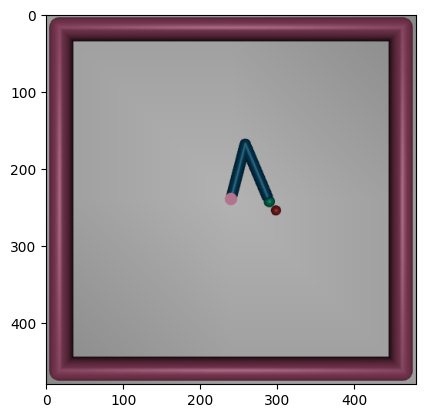

50
hello
[ 0.96793739 -0.79429637 -0.25119158 -0.60753048 -0.02015657 -0.07946279
  1.20109023  0.53226049  0.01559243  0.01160522  0.        ]
False True


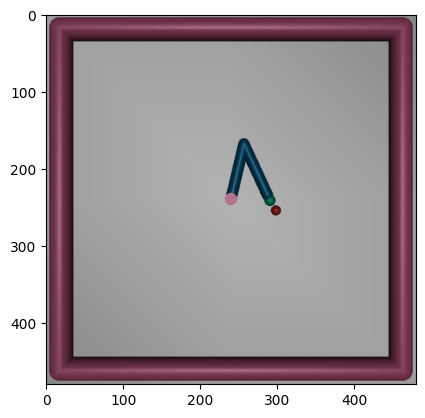

51
hello
[ 0.97360061 -0.78821998 -0.2282583  -0.61539358 -0.02015657 -0.07946279
  1.16131561  0.4617138   0.01764984  0.01052165  0.        ]
False True


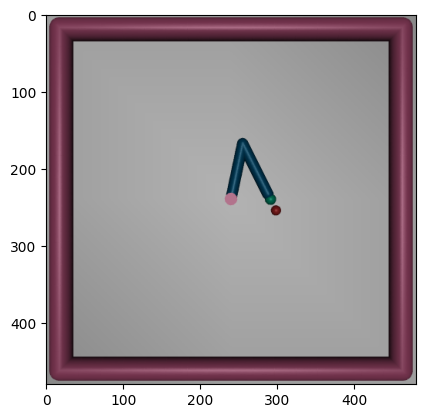

52
hello
[ 0.97858602 -0.78237741 -0.20583827 -0.62280462 -0.02015657 -0.07946279
  1.13558401  0.4819339   0.01969491  0.00955226  0.        ]
False True


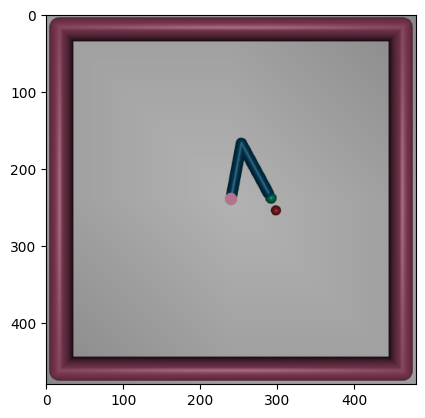

53
hello
[ 0.98296913 -0.77653778 -0.18377073 -0.63007069 -0.02015657 -0.07946279
  1.11439636  0.45036072  0.02175236  0.00865584  0.        ]
False True


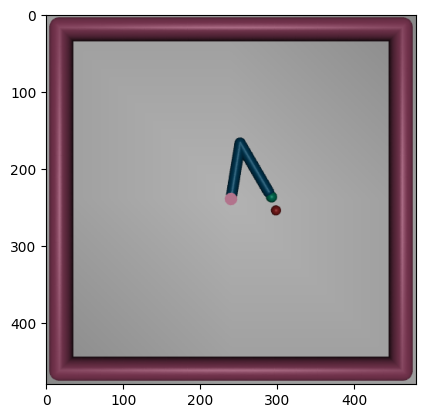

54
hello
[ 0.98690058 -0.7705812  -0.16132965 -0.63734184 -0.02015657 -0.07946279
  1.1637734   0.48946124  0.02388259  0.00781554  0.        ]
False True


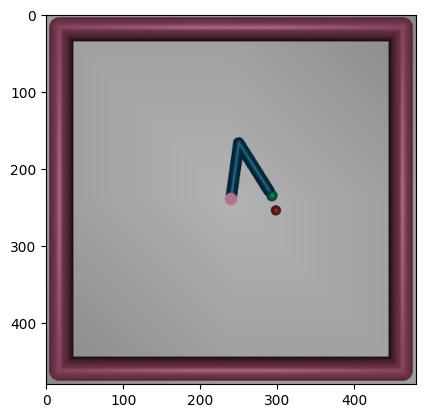

In [9]:
env = gym.make("Reacher-v4", render_mode = 'rgb_array')
print(env)
obs = env.reset()[0]
for t in range(55):
    print(t)
    print('hello')
    print(obs)
    action = model.predict(obs)[0]
    obs, reward, terminated, truncated, info= env.step(action)
    print(terminated, truncated)
    plt.imshow(render_birds_eye(env))
    plt.show()
    

In [76]:

env.reset()
env.step(action)

(array([ 0.99680494,  0.99974124, -0.0798744 ,  0.02274749, -0.15526549,
        -0.12271926, -0.05882379, -0.12780565,  0.36476603,  0.10844226,
         0.        ]),
 -0.3819690383859937,
 False,
 False,
 {'reward_dist': -0.3806322330963825, 'reward_ctrl': -0.0013368053})

In [47]:
import pickle

In [48]:
# open pickle file
with open('reacher_dataset.pkl', 'rb') as f:
    data = pickle.load(f)

In [49]:
data[0][0].shape

(64, 64, 3)

In [50]:
data[0][1]

array([ 0.99944305,  0.99541453,  0.03337051, -0.09565516,  0.16459244,
        0.00473567,  0.00252209, -0.00277171,  0.04513761, -0.0082609 ,
        0.        ])

In [51]:
print('hello')

hello


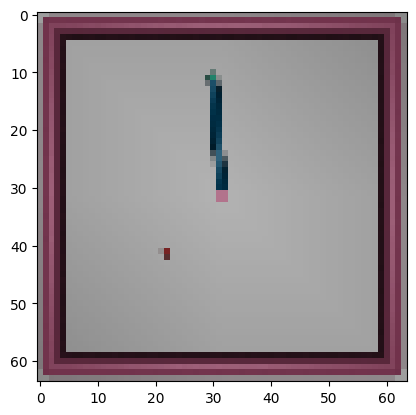

In [52]:
plt.imshow(data[100][0])

In [53]:
data[100][1]

array([ 9.97337675e-01,  9.99985334e-01,  7.29216149e-02,  5.41594256e-03,
       -9.89622121e-02,  9.76886554e-02, -1.81974052e-04,  1.51757431e-03,
        3.08358072e-01, -8.17810663e-02,  0.00000000e+00])

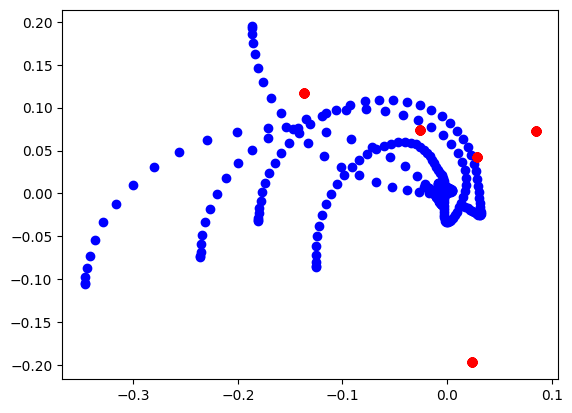

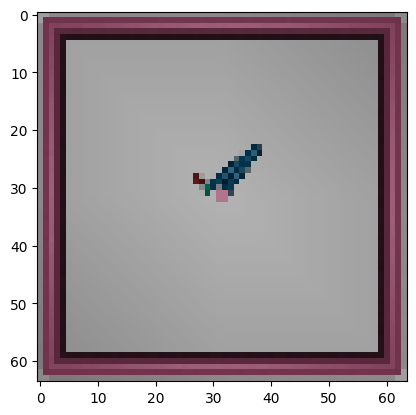

In [55]:
for i in range(250,500):
    target_x = data[i][1][4]
    target_y = data[i][1][5]
    true_x = data[i][1][8]
    true_y = data[i][1][9]
    plt.scatter(target_x, target_y, c='r')
    plt.scatter(true_x, true_y, c='b')
plt.show()
plt.imshow(data[i][0])